In [30]:
import pandas as pd

# Load the inventory dataset
inventory_df = pd.read_csv('inventory.csv')

# Load the new inventory dataset
new_inventory_df = pd.read_csv('new_inventory.csv')


In [32]:
# Get all unique dates from both datasets
all_dates = pd.concat([inventory_df['Date'], new_inventory_df['Inventory Receive']]).drop_duplicates().reset_index(drop=True)

# Get all unique item numbers
all_item_numbers = pd.concat([inventory_df['Item Number'], new_inventory_df['Item Number']]).drop_duplicates().reset_index(drop=True)

# Create an empty dataframe to store inventory levels
inventory_levels = pd.DataFrame(index=all_dates, columns=all_item_numbers)

# Merge inventory and new inventory data
merged_df = pd.merge(inventory_df, new_inventory_df, on=['Item Number'], how='outer')

# Fill NaN values with 0
merged_df['Total Item Qty'].fillna(0, inplace=True)

# Calculate inventory levels
for date in all_dates:
    for item_number in all_item_numbers:
        previous_inventory = inventory_df.loc[(inventory_df['Item Number'] == item_number) & (inventory_df['Date'] == date), 'Inventory'].sum()
        received_inventory = merged_df.loc[(merged_df['Item Number'] == item_number) & (merged_df['Inventory Receive'] <= date), 'Total Item Qty'].sum()
        inventory_levels.loc[date, item_number] = previous_inventory + received_inventory


In [33]:
# Display the inventory levels table
print(inventory_levels)


Item Number 064-01-1347 064-01-1361 064-01-1375 064-01-1385 064-01-1399   
6/17/2023        3561.0      4035.0      2684.0      5136.0      6399.0  \
7/7/2023         3000.0      2624.0      1580.0      2696.0      3300.0   
7/9/2023         6568.0      7244.0      3348.0      5892.0      9036.0   
7/21/2023        2000.0      2000.0         0.0      2000.0      2400.0   
8/16/2023        6568.0      7244.0      6748.0      5892.0      9036.0   
10/13/2023          0.0         0.0         0.0         0.0         0.0   
7/10/2023        2000.0      2000.0         0.0      2000.0      2400.0   
8/4/2023         8368.0      9444.0      6748.0      8092.0     11036.0   
9/8/2023         8368.0      9444.0      6748.0      8092.0     11036.0   
8/25/2023        6568.0      7244.0      6748.0      5892.0      9036.0   
9/29/2023        8368.0      9444.0      6748.0      8092.0     11036.0   
9/24/2023        8368.0      9444.0      6748.0      8092.0     11036.0   
7/14/2023        2000.0  

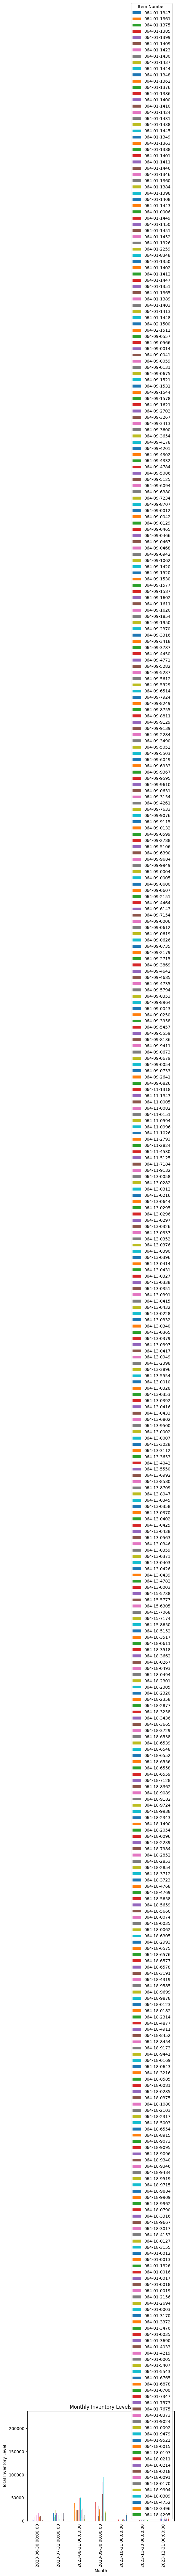

In [34]:
# Convert the date column to datetime format
inventory_levels.index = pd.to_datetime(inventory_levels.index)

# Group the data by month and calculate the sum of inventory levels
monthly_inventory = inventory_levels.resample('M').sum()

# Create the bar chart
monthly_inventory.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Total Inventory Level')
plt.title('Monthly Inventory Levels')
plt.show()
